In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
# To use only Google Colab
! pip install matplotlib --upgrade
! wget https://github.com/javieriserte/qualitative-data-course/raw/master/classes/C01.py

# Unidad I: Variables, distribuciones y pruebas de hipótesis

- Variables aleatorias y funciones de distribución.
- Variables aleatorias discretas y continuas, niveles de medición.
- Distribuciones importantes
- Generación de distribuciones a partir de operaciones con variables aleatorias
  conocidas.


## Variables aleatorias

Una **variable aleatoria** es una magnitud que puede tomar distintos valores como resultado de un **proceso aleatorio** o de **variabilidad natural**.
En estadística, las variables se clasifican según la **naturaleza de sus valores** y su **rol dentro del análisis**.

### Tipos según su naturaleza

| Tipo de variable             | Descripción                                                              | Subtipos                                                                                                                                                                                   | Ejemplo                         |
| ---------------------------- | ------------------------------------------------------------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ | ------------------------------- |
| **Categórica o cualitativa** | Representa grupos o categorías. No tiene significado numérico directo.   | - **Nominal:** categorías sin orden (por ejemplo, tipo de flor).<br>- **Ordinal:** categorías con orden lógico (por ejemplo, nivel de expresión bajo/medio/alto).                          | Especie, color, nivel educativo |
| **Cuantitativa o numérica**  | Representa cantidades medibles. Los valores tienen significado numérico. | - **Discreta:** toma valores enteros (por ejemplo, número de mutaciones).<br>- **Continua:** puede tomar cualquier valor real dentro de un rango (por ejemplo, concentración de proteína). | Edad, peso, temperatura         |

### Consideraciones analíticas

* Los **métodos estadísticos** dependen del tipo de variable:

  * Los métodos para variables **ordinales** no pueden aplicarse a variables **nominales**.
  * Los métodos para variables **nominales** pueden usarse con variables **ordinales**, pero **pierden precisión**, porque ignoran la información del orden.
* Las variables cualitativas con **dos categorías** se denominan **binarias**, **dicotómicas** o **booleanas**.

### Rol dentro del análisis

| Tipo de variable                         | Definición                                            | Ejemplo                                            |
| ---------------------------------------- | ----------------------------------------------------- | -------------------------------------------------- |
| **Variable explicativa (independiente)** | Aquella que se controla o manipula en un experimento. | Tipo de tratamiento, dosis, condición experimental |
| **Variable de respuesta (dependiente)**  | Aquella que se mide u observa como resultado.         | Expresión génica, tasa de crecimiento, rendimiento |


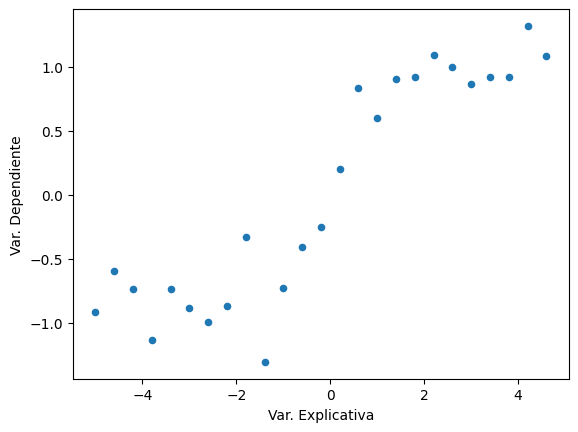

In [3]:
import C01
C01.variables_plot()

## Función de masa y densidad de probabilidad

Las **funciones de probabilidad** describen cómo se distribuyen los valores posibles de una **variable aleatoria** y qué **probabilidad relativa** tiene cada uno.
El nombre de la función depende del tipo de variable considerada.


### Tipos de funciones

| Tipo de variable | Nombre                              | Sigla                                    | Descripción                                                                                  |
| ---------------- | ----------------------------------- | ---------------------------------------- | -------------------------------------------------------------------------------------------- |
| **Discreta**     | Función de masa de probabilidad     | **PMF** (*Probability Mass Function*)    | Asigna una probabilidad específica a cada valor posible de la variable.                      |
| **Continua**     | Función de densidad de probabilidad | **PDF** (*Probability Density Function*) | Describe la forma de la distribución; la probabilidad se obtiene como el área bajo la curva. |


### Propiedades fundamentales

* La **probabilidad total** es siempre igual a 1.

  $
  \sum_x PMF_X(x) = 1 \quad \text{(discreta)} \qquad \int_{-\infty}^{\infty} PDF_X(x),dx = 1 \quad \text{(continua)}
  $

* Para una variable **discreta**:

  $
  PMF_X(a) = P(X = a)
  $

  Cada punto del dominio tiene una probabilidad asociada, con valores entre 0 y 1.

* Para una variable **continua**:

  $
  P(a \le X \le b) = \int_a^b PDF_X(x),dx
  $

  No tiene sentido hablar de la probabilidad en un punto, ya que ( P(X = a) = 0 ).


### Interpretación geométrica

* En una **PMF**, la altura de cada barra representa la probabilidad exacta de cada valor.
* En una **PDF**, el **área bajo la curva** en un intervalo representa la probabilidad de que la variable caiga en ese rango.
* En ambos casos, el área o suma total equivale a **1**, es decir, a la probabilidad total del espacio muestral.


In [ ]:
import C01

C01.pmf_example()

In [ ]:
C01.pdf_example()

### Funciones de distribución acumulada

Es una función que retorna la probabilidad de que una variable aleatoria no
nominal sea menor o igual a un determinado valor.

- $F_X(x) = P(X\leq x)$

- Tienen diferentes nombres dependiendo del tipo de variable.
  - Para variables continuas: CDF (Cummulative density function):
    - $ CDF_X(x) = \int_{-\infty}^{x} PDF_X(u) du $
  - Para variables categóricas: CMF (Cummulative mass function):
    - $ CMF_X{x} = \sum\limits_{X \leqslant x} PMF_X(x) $

- La imagen es el intervalo $[0, 1]$.
- Es monótona creciente.
- Es fácil obtener la probabilidad de que un valor de $X$ caiga dentro de un
  cierto intervalo $(a,b]$ usando su $CDF$:
  - $P(a < X \leqslant b) = CDF_X(b) - CDF_X(a)$

- Para calcular la probabilidad de observar un valor mayor a otro dado:
  - $CCDF(x) = P(X > x) = 1 - CDF(x)$
  - (*Complementary Cumulative Distribution Function*, **CCDF**)


In [ ]:
import C01
C01.cmf_example()

In [ ]:
import C01
C01.cdf_example()


## Niveles de medición de las variables

Las **variables aleatorias** representan resultados de **experimentos aleatorios**, donde bajo las mismas condiciones pueden obtenerse valores distintos.
Cada variable puede medirse en distintos **niveles de medición**, que determinan **qué tipo de información contiene** y **qué operaciones son válidas** realizar con ella.

El nivel de medición define el grado de precisión con el que se cuantifica la información y condiciona los métodos estadísticos aplicables.

### Escalas de medición

| Nivel          | Tipo de variable                    | Precisión | Descripción                                                                                         | Operaciones válidas                           |
| -------------- | ----------------------------------- | --------- | --------------------------------------------------------------------------------------------------- | --------------------------------------------- |
| **Nominal**    | Cualitativa                         | Baja      | Clasifica en **categorías sin orden**. Identifica o etiqueta.                                       | Comparaciones de igualdad (`==`, `!=`)        |
| **Ordinal**    | Cualitativa / Cuantitativa discreta | Media     | Las categorías tienen **orden**, pero **no hay distancias definidas** entre ellas.                  | Comparaciones de orden (`<`, `>`, `<=`, `>=`) |
| **Intervalar** | Cuantitativa continua               | Alta      | Las diferencias son significativas, pero el **cero es arbitrario** (no indica ausencia).            | Operaciones de suma y resta (`+`, `-`)        |
| **Racional**   | Cuantitativa continua               | Máxima    | Escala con **cero absoluto** (indica ausencia real). Permite **todas las operaciones aritméticas**. | Multiplicación y división (`*`, `/`)          |

### Ejemplos

| Nivel      | Ejemplo                                                    |
| ---------- | ---------------------------------------------------------- |
| Nominal    | Tipo de flor, especie bacteriana                           |
| Ordinal    | Nivel de expresión génica: bajo, medio, alto               |
| Intervalar | Temperatura en °C (el cero no implica ausencia de calor)   |
| Racional   | Longitud de un pétalo en cm, concentración de una proteína |

### Importancia práctica

* El nivel de medición **determina qué estadísticos pueden calcularse** (media, mediana, proporciones, etc.).
* En análisis de datos, usar el **tipo de escala correcto** evita errores de interpretación y asegura la validez de las conclusiones.


## Distribuciones paramétricas y no paramétricas

- Distribuciones paramétricas:
  - La forma de la distribución está dada por un modelo matemático teórico que
    describe el problema de origen.
  - Suelen tener uno o más parámetros que definen la forma.
  - Ejemplos:
    - Normal, Exponential.

- Distribuciones no paramétricas:
  - Son construidas empíricamente a partir de los datos.
  - Ejemplos:
    - Histogramas
    - Triangular




## Distribuciones importantes

La distribuciones más conocidas para datos continuos o discretos son:

- la distribución Normal,
- la distribución T,
- la distribución de Poisson.

Algunas de las distribuciones más importantes para datos categóricos:

- la **Binomial**,
- la **Multinomial**



### Distribución Normal

- También llamada *Distribución de Gauss* o *Gaussiana*.
- Su función de densidad de probabilidad es la *campana de Gauss*.
- Tiene dos parámetros de forma:
  - el promedio $μ$
  - la desviación estándar $σ$
- Una distribución normal con parametros $μ=0$ y $σ=1$ se conoce como **normal estándar**:
  - $\mathcal{N}(0,1)$
- La ecuación de la distribución normal es:
  - $f(x, μ, σ) = \frac{1}{σ\sqrt{2 π}}exp \Bigg( {-\frac{(x - μ)^2}{2σ^2}} \Bigg)$

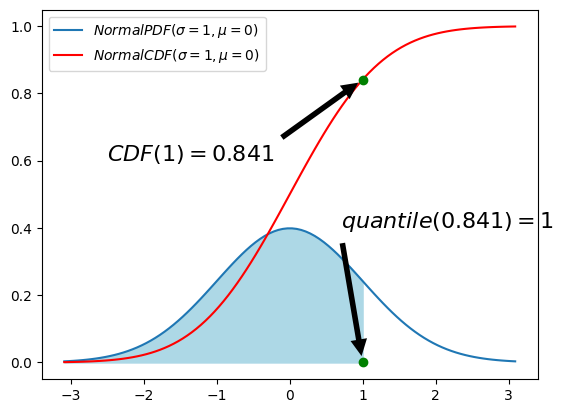

In [1]:
import C01
C01.normal_dist_description()

In [ ]:
import C01
C01.normal_distribution_mu_plot()

In [ ]:
C01
C01.normal_distribution_sigma_plot()

- Esta distribución es importante debido al **Teorema Central del Límite**
  - Si se tiene una muestra de una distribución:
    - de valores *independientes e idénticamente distribuidos*
    - tamaño $n$
    - media poblacional $\mu$
    - desviación estándar $\sigma$
  - la distribución de la media muestral ($\overline{x_{n}}$)
    - converge a una distribución $\overline{x_{n}} \sim \mathcal{N}(\mu,\frac{\sigma}{\sqrt{n}})$
    - cuando $n \rightarrow \infty$


In [ ]:
import C01
C01.central_limit_plot()


Ejercicio:

- ¿Cómo puedo generar de datos aleatorios de una función de densidad de probabilidad?
  - Suponemos que sabemos obtener datos aleatorios de una     distrubición uniforme.

### Generación de datos aleatorios de una distribución normal

In [ ]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

normal_sample = norm.rvs(
  loc = 0, # mu
  scale = 1, # sigma / std. dev.
  size = 1000 # tamaño de la muestra
)

plt.hist(
  normal_sample,
  bins = 20,
  density = True
)

plt.title("Sample of normal distribution")
plt.xlabel("Domain")
plt.ylabel("Density")

x = np.linspace(-3, +3, 100)
a = plt.plot(
    x,
    norm.pdf(x, loc = 0, scale = 1)
)


### Distribución T

La distribución T (de *Student*):
  - surge de estimar la media de:
    - una muestra pequeña de tamaño $n$
    - con distribución normal
    - y la desviación estándar de la población ($\sigma$) es desconocida.
  - La variable aleatoria que se obtiene de tener ...
    - la media de muestra ($\bar{X}$)
    - restarle la media poblacional ($\mu$)
    - dividirla por el cociente de:
      - la desviación estándar de la muestra ($S$)
      - sobre $\sqrt{n}$.
    - tiene un distribución T,
      - con $\nu = n-1$ grados de libertad.
  - La ecuación es $t = \frac{\overline{X_{n}}-\mu}{\frac{S_{n}}{\sqrt{n}}}$
  - La forma es:
    - similar a la distribución normal estándar
    - pero con colas más pesadas
  - Converge hacia:
    - una distribución normal $\mathcal{N}(0,1)$
    - cuando $\nu \rightarrow \infty$.
  - La función de densidad de probabilidad es:
    - $PDF_{T}(x, \nu) = \frac{\Gamma (\frac{\nu+1}{2})}{\sqrt{\nu\pi}\times \Gamma(\frac{\nu}{2})}\bigg(1+\frac{x^2}{2}\bigg)^{-\frac{\nu+1}{2}}$
    - $\Gamma$ es la función Gamma.





In [ ]:
import C01
C01.distribution_t_plot()

### Poisson Distribution

Es una función:
- de probabilidad discreta
- describe la cantidad de eventos independientes
- que ocurren dentro de una unidad de tiempo (o espacio, area, volumen, etc).
- $PMF(k, \lambda) = \frac{\lambda^k}{k!}e^{-\lambda}$
  - $\lambda$ es la frecuencia promedio de ocurrencia de un evento.
  - $\lambda = E(X) = Var(X)$


Un ejemplo:

- Al año una persona recibe un promedio de 77 llamadas fraudulentas por
  teléfono.
- Cual es la distribución de probabilidades de obtener 0, 1, 2, etc llamadas en
  30 días.


In [ ]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

# Calcular la probabilidad promedio
p = (77 / 365) * 30

x = np.arange(int(3*p))

y = poisson.pmf(
  k = x,
  mu = p
)

bplot = plt.bar(
  x = x,
  height = y
)

bplot.patches[6].set_color("red")
plt.annotate(
  xy = (6, poisson.pmf(6, p) * 0.9),
  xytext = (9, poisson.pmf(6, p) * 0.95),
  text = f"$PMF_X(6) = {poisson.pmf(6, p):0.3f}...$",
  arrowprops = dict(
    arrowstyle = "->"
  ),
  fontsize = 14,
  bbox = dict(
    boxstyle = 'round',
    fc = 'lightgray'
  )
)
plt.title("Poisson distribution example")

plt.xticks(
  ticks = x,
  labels = x
)
plt.tight_layout()



### Distribución Binomial

- Se utiliza con:
  - variables categóricas
  - que sólo pueden tomar dos valores (dicotómicas)
    - *éxito* (`1`, `true`)
    - *fracaso* (`0`, `false`).
  - El número de éxitos:
    - producios de $n$ ensayos (*ensayos de Bernoulli*)
    - sigue una **distribución binomial** con parámetros $n$ y $p$
      - $p$ es la probabilidad de éxito.
  - Se asume que:
    - $n$ es fijado de antemano.
    - $p$ es idéntico en todos los ensayos.
  - Se puede describir con la ecuación:
  - $P(X=k) = {n\choose k}p^k(1-p)^{n-k}, 0 \leq k \leq n$
  - ${n \choose k} = \frac{n!}{(n-k)!k!} = \text{Combinaciones de k sobre n}$

In [ ]:
import C01
C01.binomial_plot()

In [ ]:
import C01
C01.binomial_cmf_plot()


### Distribución Multinomial

Es una generalización de la **distribución binomial**
  - más de dos categorías.
  - Para $n$ ensayos
  - en $k$ categorías
  - cada categoría tiene una probabilidad de éxito fija $p_{k}$
  - da la probabilidad de
    - una combinación de números de éxitos particular
    - para varias categorías.
  - Se puede representar con la ecuación:
    - $ \frac{n!}{x_1! \dotsm x_k!}p_1^{x_1} \dotsm {p_k^{x_k}}$

¿Cuál es la probabilidad de obtener una tirada con seis dados en la que todos los
valores sean diferentes?

In [2]:
from scipy.stats import multinomial

# Defino las probabilidades de exito de cada evento
pk = [1/6] * 6
print(
  multinomial.pmf([1]*6, n=6, p=pk)
)

n_samples = 100000
sample = multinomial.rvs(n=6, p=pk, size = n_samples)

uniques = np.apply_along_axis(
   np.max, 1, sample
)
uniques

number_success = uniques[uniques == 1].sum()
number_success / n_samples

0.01543209876543212


NameError: name 'np' is not defined

¿Cuál es la probabilidad obtener al menos 5 dados iguales?


In [ ]:
from scipy.stats import multinomial

# Defino las probabilidades de exito de cada evento

pk = [1/6] * 6
prob_6_1 = multinomial.pmf([6, 0, 0, 0, 0, 0], n=6, p=pk)
prob_6 = prob_6_1 * 6
prob_5_1_and_1_2 = multinomial.pmf([5, 1, 0, 0, 0, 0], n=6, p=pk)
prob_5_1 = prob_5_1_and_1_2 * 5
prob_5 = prob_5_1 * 6
print(f"La probabilidad de obtener exactamente 5 iguales es: {prob_5}")
print(f"La probabilidad de obtener exactamente 6 iguales es: {prob_6}")
print(f"La probabilidad de obtener al menos 5 iguales es: {prob_5 + prob_6}")

Otra forma de resolverlo, detallando explicitamente todas las combinaciones
posibles.

In [ ]:
cases = np.row_stack(
  [
    np.identity(n=6) * 6
  ] +
  [
    np.insert(
    arr = np.identity(n=5),
    obj = x,
      values = 5,
      axis = 1
    )
    for x in np.arange(6)
  ]
)

prob_5_6 = multinomial.pmf(cases, n = 6, p=pk).sum()
print(f"La probabilidad de obtener al menos 5 iguales es: {prob_5_6}")

"Corroboramos" el resultado con datos simulados.

In [ ]:
n_samples = 10000000
sample = multinomial.rvs(
  n=6,
  p=pk,
  size = n_samples
)

uniques = np.apply_along_axis(
  lambda x: any(x>=5), 1, sample
)

number_success = uniques[uniques == 1].sum()
print(
  "Número de éxitos hallados / esperados: "
  f"[{number_success} / {n_samples*(prob_5+prob_6)}]"
)
number_success / n_samples

### Distribución chi-cuadrado (χ²)

#### Concepto general

La **distribución chi-cuadrado (χ²)** describe la variabilidad de la **suma de cuadrados de variables normales estándar independientes**.

Es una distribución fundamental en estadística inferencial, utilizada para evaluar **ajustes de modelos** y **relaciones entre variables categóricas**.

### Definición

Si ( Z_1, Z_2, ..., Z_k ) son variables normales estándar ( N(0,1) ), entonces:
$
X = \sum_{i=1}^{k} Z_i^2
$
sigue una **distribución chi-cuadrado con ( k ) grados de libertad**.

### Propiedades

* **Valores siempre positivos:** $ X \ge 0 $
* **Media:** $ E[X] = k $
* **Varianza:** $ Var[X] = 2k $
* **Forma:** asimétrica hacia la derecha, más simétrica a medida que ( k ) aumenta.

### Aplicaciones comunes

| Uso                              | Descripción                                                                      |
| -------------------------------- | -------------------------------------------------------------------------------- |
| **Prueba de independencia**      | Evalúa si dos variables categóricas son independientes (tablas de contingencia). |
| **Prueba de bondad de ajuste**   | Compara una distribución observada con una distribución teórica esperada.        |
| **Análisis de varianza (ANOVA)** | Aparece en la derivación de las distribuciones F y t.                            |



#### Intuición de la distribución chi-cuadrado

1. la **variabilidad de los datos** expresada como **suma de cuadrados**
2. la **comparación entre lo que observamos y lo que esperaríamos por azar**

Imaginemos que tomamos varias variables aleatorias normales estándar:

$ Z_1, Z_2, ..., Z_k \sim N(0, 1) $

Cada $ Z_i $ puede ser positivo o negativo, pero en promedio su valor esperado es 0.
Si elevamos al cuadrado cada uno y los sumamos:

$
\chi^2 = Z_1^2 + Z_2^2 + \dots + Z_k^2
$

* Cada término ( Z_i^2 ) representa **una desviación al cuadrado** respecto al promedio esperado (0).
* Al sumar esas desviaciones cuadradas, obtenemos una **medida total de variabilidad**.

Esa suma **nunca es negativa** y **aumenta si los datos se alejan más de lo esperado**.

Por eso, la **distribución chi-cuadrado** describe **cuánto se desvían los valores observados de lo esperado**.
